## FIFA 2022 VIZUALIZATION - using PLOTLY

*Author - Olalekan Fagbuyi*

### Introduction

Visualisations have always been an integral part of the Data Science process due to their ability to tell compelling stories and stoke users' imaginations. Proper use of visualizations also provides a better perspective and proper context for data users which enables them to spot trends and helps in making vital decisions in a faster manner.

Python has an array of visualization packages such as; Matplolib, Seaborn, Plotly, GGplot, Altair, Bokeh, to mention a few. This project makes use of the **Plotly** package to analyze data on football(soccer) players sourced from **EA Sport's FIFA 2023** via [Kaggle](https://www.kaggle.com/datasets/sanjeetsinghnaik/fifa-23-players-dataset).

The plotly package was picked because of its interactive nature which allows for better storytelling, and better aesthetics when compared to Matplotlib and Seaborn, a wide range of statistical/scientific/ geographic charts and lastly its flexibility. Various graphs from this library are going to be used in illustrating the dataset. Also, a couple of pandas methods will be used to manipulate the dataset in order to present quality graphs.

### 1. Import Libraries and Loading Dataset

In [1]:
#Data Analysis
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
from plotly.subplots import make_subplots
import plotly.express as px
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

#Notebook Settings
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load data
players_info = pd.read_csv("C:\\Users\\ofagb\\OneDrive\\Documents\\Python\\Fifa 23 Players Data.csv", encoding = 'latin1')
players_info.head()

,Player Name,Player Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Club Name,Wage(in Euro),Release Clause,Club Position,Contract Until,Club Jersey Number,Joined On,On Loan,Preferred Foot,Weak Foot Rating,Skill Moves,International Reputation,National Team Name,National Team Image Link,National Team Position,National Team Jersey Number,Attacking Work Rate,Defensive Work Rate,Pace Total,Shooting Total,Passing Total,Dribbling Total,Defending Total,Physicality Total,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,LongPassing,BallControl,Acceleration,Sprint Speed,Agility,Reactions,Balance,Shot Power,Jumping,Stamina,Strength,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,Goalkeeper Diving,Goalkeeper Handling,GoalkeeperKicking,Goalkeeper Positioning,Goalkeeper Reflexes,ST Rating,LW Rating,LF Rating,CF Rating,RF Rating,RW Rating,CAM Rating,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,-,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21


In [3]:
# replacing blank spaces with '' i.e merging column names to remove blank spaces
players_info.columns =[column.replace(" ", "") for column in players_info.columns]

#view cleaned df
players_info.head()

,PlayerName,PlayerFullName,Overall,Potential,Value(inEuro),PositionsPlayed,BestPosition,Nationality,ImageLink,Age,Height(incm),Weight(inkg),TotalStats,BaseStats,ClubName,Wage(inEuro),ReleaseClause,ClubPosition,ContractUntil,ClubJerseyNumber,JoinedOn,OnLoan,PreferredFoot,WeakFootRating,SkillMoves,InternationalReputation,NationalTeamName,NationalTeamImageLink,NationalTeamPosition,NationalTeamJerseyNumber,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FreekickAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GoalkeeperDiving,GoalkeeperHandling,GoalkeeperKicking,GoalkeeperPositioning,GoalkeeperReflexes,STRating,LWRating,LFRating,CFRating,RFRating,RWRating,CAMRating,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,-,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21


In [4]:
#checking for datatype of and null values in each column using info() method
players_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   PlayerName                18539 non-null  object
 1   PlayerFullName            18539 non-null  object
 2   Overall                   18539 non-null  int64 
 3   Potential                 18539 non-null  int64 
 4   Value(inEuro)             18539 non-null  int64 
 5   PositionsPlayed           18539 non-null  object
 6   BestPosition              18539 non-null  object
 7   Nationality               18539 non-null  object
 8   ImageLink                 18539 non-null  object
 9   Age                       18539 non-null  int64 
 10  Height(incm)              18539 non-null  int64 
 11  Weight(inkg)              18539 non-null  int64 
 12  TotalStats                18539 non-null  int64 
 13  BaseStats                 18539 non-null  int64 
 14  ClubName              

In [5]:
#checking for duplicate values
print('Are there any duplicates?', players_info.duplicated().any())

#How many duplicates?
duplicates = players_info.duplicated().sum()
print('How many duplicates?', duplicates)

Are there any duplicates? True
How many duplicates? 119


In [6]:
#locating for duplicated rows
duplicateRows = players_info[players_info.duplicated()]
duplicateRows

#deleting duplicate values
players_info.drop_duplicates(keep = 'first', inplace = True)
players_info.shape

(18420, 89)

### 2. Feature Engineering - Creating Conditional Columns

Before creating visualizations, the dataset will need to be engieenred to create new columns. In this section, new features  called **PlayerCategory** , **ClubCategory**, **Position** and **Confedration** are going to be created by applying conditional statements to the already existing columns namely;  **Overall** , **ClubName** ,**Best Position**  and **NationalTeam** columns.

Different methods such as; np.select(), for loops and map() will be applied to create these conditional columns

#### 2.1 Player Category Column - using np.select() method

In [7]:
#creating player_category column using Overall column
#define conditions
conditions = [
    (players_info['Overall'] >= 85),
    (players_info['Overall'] >= 80) & (players_info['Overall'] < 85),
    (players_info['Overall'] >= 75) & (players_info['Overall'] < 80),
    (players_info['Overall'] >= 64) & (players_info['Overall'] < 75),
    (players_info['Overall'] < 64)
]

#define results
results = ['World Class', 'Top Level', 'Good', 'Mid Level', 'Unrated']

#create new column based on conditions in column1 and column2
players_info['PlayerCategory'] = np.select(conditions, results)
players_info.head()

,PlayerName,PlayerFullName,Overall,Potential,Value(inEuro),PositionsPlayed,BestPosition,Nationality,ImageLink,Age,Height(incm),Weight(inkg),TotalStats,BaseStats,ClubName,Wage(inEuro),ReleaseClause,ClubPosition,ContractUntil,ClubJerseyNumber,JoinedOn,OnLoan,PreferredFoot,WeakFootRating,SkillMoves,InternationalReputation,NationalTeamName,NationalTeamImageLink,NationalTeamPosition,NationalTeamJerseyNumber,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FreekickAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GoalkeeperDiving,GoalkeeperHandling,GoalkeeperKicking,GoalkeeperPositioning,GoalkeeperReflexes,STRating,LWRating,LFRating,CFRating,RFRating,RWRating,CAMRating,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating,PlayerCategory
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22,World Class
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21,World Class
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22,World Class
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,-,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24,World Class
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21,World Class


#### 2.2 Unique Positions - using np.select() method

In [8]:
#Getting unique club names
UniquePositions = players_info['BestPosition'].unique()
print(UniquePositions)

['CAM' 'CF' 'ST' 'CM' 'RW' 'GK' 'CB' 'LW' 'CDM' 'LM' 'LB' 'RM' 'RB' 'LWB'
 'RWB']


In [9]:
#define conditions (strings)
conditions = [
    (players_info['BestPosition'] == 'CAM'),
    (players_info['BestPosition'] == 'CF'),
    (players_info['BestPosition'] == 'ST'),
    (players_info['BestPosition'] == 'CM'),
    (players_info['BestPosition'] == 'RW'),
    (players_info['BestPosition'] == 'GK'),
    (players_info['BestPosition'] == 'CB'),
    (players_info['BestPosition'] == 'LW'),
    (players_info['BestPosition'] == 'CDM'),
    (players_info['BestPosition'] == 'LM'),
    (players_info['BestPosition'] == 'LB'),
    (players_info['BestPosition'] == 'RM'),
    (players_info['BestPosition'] == 'RB'),
    (players_info['BestPosition'] == 'LWB'),
    (players_info['BestPosition'] == 'RWB'),
]

#define results
results = ['Midfielder', 'Forward', 'Forward', 'Midfielder', 'Winger','Goal Keeper', 'Centre Defender', 'Winger', 'Midfielder', 'Midfielder', 
          'Full Back', 'Midfielder', 'Full Back','Full Back', 'Full Back']

#create new column based on conditions in column1 and column2 (default specifies results when no condition is met)
players_info['Position'] = np.select(conditions, results,  default = None)

#viewing columns in new data frame
players_info.head()

,PlayerName,PlayerFullName,Overall,Potential,Value(inEuro),PositionsPlayed,BestPosition,Nationality,ImageLink,Age,Height(incm),Weight(inkg),TotalStats,BaseStats,ClubName,Wage(inEuro),ReleaseClause,ClubPosition,ContractUntil,ClubJerseyNumber,JoinedOn,OnLoan,PreferredFoot,WeakFootRating,SkillMoves,InternationalReputation,NationalTeamName,NationalTeamImageLink,NationalTeamPosition,NationalTeamJerseyNumber,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FreekickAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GoalkeeperDiving,GoalkeeperHandling,GoalkeeperKicking,GoalkeeperPositioning,GoalkeeperReflexes,STRating,LWRating,LFRating,CFRating,RFRating,RWRating,CAMRating,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating,PlayerCategory,Position
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22,World Class,Midfielder
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21,World Class,Forward
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22,World Class,Forward
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,-,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24,World Class,Midfielder
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21,World Class,Forward


#### 2.3 Confedration Column - using map() method

In [10]:
Nationalities = players_info['Nationality'].unique()
print(Nationalities)

['Argentina' 'France' 'Poland' 'Belgium' 'Egypt' 'Germany' 'Portugal'
 'Netherlands' 'England' 'Brazil' 'Korea Republic' 'Slovenia' 'Senegal'
 'Norway' 'Italy' 'Costa Rica' 'Croatia' 'Spain' 'Scotland' 'Austria'
 'Algeria' 'Slovakia' 'Serbia' 'Gabon' 'Czech Republic' 'Hungary'
 'Switzerland' 'Uruguay' 'Ghana' 'Morocco' 'Turkey' 'Montenegro'
 'Cameroon' 'Bosnia and Herzegovina' 'Colombia' 'Canada' "Côte d'Ivoire"
 'Nigeria' 'Denmark' 'Finland' 'Mexico' 'Ukraine' 'United States' 'Sweden'
 'Central African Republic' 'Mali' 'Iran' 'Burkina Faso' 'Armenia' 'Wales'
 'Greece' 'Guinea' 'Japan' 'Jamaica' 'Kosovo' 'Chile' 'Ecuador' 'Libya'
 'Russia' 'Tunisia' 'Northern Ireland' 'Mozambique' 'Peru' 'Togo'
 'Romania' 'Congo DR' 'Angola' 'Albania' 'Georgia' 'Zimbabwe'
 'North Macedonia' 'Venezuela' 'Australia' 'Paraguay'
 'Republic of Ireland' 'Gambia' 'Zambia' 'Saudi Arabia' 'Qatar'
 'New Zealand' 'Iceland' 'Suriname' 'Trinidad and Tobago' 'Israel'
 'Cape Verde Islands' 'Honduras' 'Malta' 'Liberia

In [11]:
#The Pandas .map() method will be used to create new columns after defining a dictionary based on values in an existing column

confed_dict = {'Brazil': 'CONMEBOL', 'Argentina': 'CONMEBOL', 'France': 'UEFA', 'Belgium': 'UEFA', 'England': 'UEFA', 'Netherlands': 'UEFA',
               'Croatia': 'UEFA', 'Italy': 'UEFA', 'Portugal':'UEFA', 'Spain':'UEFA', 'Morocco':'CAF', 'Switzerland':'UEFA', 
               'United States':'CONCACAF', 'Germany':'UEFA', 'Mexico':'CONCACAF', 'Uruguay': 'CONMEBOL', 'Colombia': 'CONMEBOL', 
               'Denmark': 'UEFA', 'Senegal':'CAF', 'Japan' :'AFC','Peru':'CONMEBOL', 'Poland': 'UEFA', 'Sweden' : 'UEFA', 'Iran': 'AFC', 
               'Korea Republic' : 'AFC', 'Ukraine' : 'UEFA','Australia' : 'AFC', 'Wales' : 'UEFA', 'Serbia' : 'UEFA', 'Tunisia': 'CAF',
               'Chile': 'CONMEBOL', 'Costa Rica': 'CONCACAF', 'Cameroon': 'CAF','Austria': 'UEFA', 'Nigeria' :'CAF', 'Hungary': 'UEFA', 
               'Russia' : 'UEFA','Czech Republic': 'UEFA', 'Egypt' : 'CAF', 'Algeria':'CAF', 'Ecuador' : 'CONMEBOL', 'Scotland':'UEFA',
              'Norway' : 'UEFA', 'Turkey':'UEFA','Mali' : 'CAF', 'Paraguay':'CONEMBOL',"Côte d'Ivoire" : 'CAF', 'Republic of Ireland':'UEFA',
              'Saudi Arabia' : 'AFC', 'Burkina Faso': 'CAF'}

players_info['Confederation'] = players_info['Nationality'].map(confed_dict).fillna('Outside Top40')
players_info.head()

,PlayerName,PlayerFullName,Overall,Potential,Value(inEuro),PositionsPlayed,BestPosition,Nationality,ImageLink,Age,Height(incm),Weight(inkg),TotalStats,BaseStats,ClubName,Wage(inEuro),ReleaseClause,ClubPosition,ContractUntil,ClubJerseyNumber,JoinedOn,OnLoan,PreferredFoot,WeakFootRating,SkillMoves,InternationalReputation,NationalTeamName,NationalTeamImageLink,NationalTeamPosition,NationalTeamJerseyNumber,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FreekickAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GoalkeeperDiving,GoalkeeperHandling,GoalkeeperKicking,GoalkeeperPositioning,GoalkeeperReflexes,STRating,LWRating,LFRating,CFRating,RFRating,RWRating,CAMRating,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating,PlayerCategory,Position,Confederation
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22,World Class,Midfielder,CONMEBOL
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21,World Class,Forward,UEFA
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22,World Class,Forward,UEFA
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,-,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24,World Class,Midfielder,UEFA
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21,World Class,Forward,UEFA


#### 2.4 Club Category Column - using for loop

In [12]:
#creating 2nd cateory for clubs. THe top 30 clubs based on popularity and prestige are classified as top clubs, and the rest as others
def conditions(row):
    if row['ClubName']== 'Paris Saint-Germain':
        val = 'Top Club'
    elif row['ClubName'] == 'Real Madrid CF':
        val = 'Top Club'
    elif row ['ClubName'] == 'FC Barcelona':
        val = 'Top Club'
    elif row ['ClubName'] == 'Manchester City':
        val = 'Top Club'
    elif row ['ClubName'] == 'Liverpool':
        val = 'Top Club'
    elif row ['ClubName'] == 'FC Bayern München':
        val = 'Top Club'
    elif row ['ClubName'] == 'FC Porto':
        val = 'Top Club'
    elif row['ClubName']  == 'Manchester United':
        val = 'Top Club'
    elif row['ClubName'] == 'Tottenham Hotspur':
        val = 'Top Club'
    elif row ['ClubName'] == 'Atlético de Madrid':
        val = 'Top Club'
    elif row ['ClubName'] == 'Chelsea':
        val = 'Top Club'
    elif row ['ClubName'] == 'Ac Milan':
        val = 'Top Club'
    elif row ['ClubName'] == 'Inter':
        val = 'Top Club'
    elif row ['ClubName'] == 'Juventus':
        val = 'Top Club'
    elif row ['ClubName'] == 'Napoli':
        val = 'Top Club'
    elif row ['ClubName'] == 'PSV':
        val = 'Top Club'
    elif row ['ClubName'] == 'SL Benfica':
        val = 'Top Club'
    elif row ['ClubName'] == 'RB Leipzig':
        val = 'Top Club'
    elif row ['ClubName'] == 'Borussia Dortmund':
        val = 'Top Club'
    elif row ['ClubName'] == 'Ajax':
        val = 'Top Club'
    elif row ['ClubName'] == 'Arsenal':
        val = 'Top Club'
    elif row ['ClubName'] == 'Olympique de Marseille':
        val = 'Top Club'
    elif row['ClubName']  == 'Sporting CP':
        val = 'Top Club'
    elif row ['ClubName'] == 'Olympique Lyonnais':
        val = 'Top Club'
    elif row['ClubName']  == 'Sevilla':
        val = 'Top Club'
    elif row ['ClubName'] == 'Newcastle':
        val = 'Top Club'
    elif row['ClubName']  == 'Roma':
        val = 'Top Club'
    elif row['ClubName'] == 'FC Porto':
        val = 'Top Club'
    elif row['ClubName'] == 'LOSC Lille':
        val = 'Top Club'
    elif row['ClubName'] == 'Bayer 04 Leverkusen':
        val = 'Top Club'
    else:
        val = 'Others'
    return val
    
#Apply the function to each data point in the data frame
players_info['ClubCategory']= players_info.apply(conditions, axis=1)

#viewing columns in new data frame
players_info.head()

,PlayerName,PlayerFullName,Overall,Potential,Value(inEuro),PositionsPlayed,BestPosition,Nationality,ImageLink,Age,Height(incm),Weight(inkg),TotalStats,BaseStats,ClubName,Wage(inEuro),ReleaseClause,ClubPosition,ContractUntil,ClubJerseyNumber,JoinedOn,OnLoan,PreferredFoot,WeakFootRating,SkillMoves,InternationalReputation,NationalTeamName,NationalTeamImageLink,NationalTeamPosition,NationalTeamJerseyNumber,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FreekickAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GoalkeeperDiving,GoalkeeperHandling,GoalkeeperKicking,GoalkeeperPositioning,GoalkeeperReflexes,STRating,LWRating,LFRating,CFRating,RFRating,RWRating,CAMRating,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating,PlayerCategory,Position,Confederation,ClubCategory
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22,World Class,Midfielder,CONMEBOL,Top Club
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21,World Class,Forward,UEFA,Top Club
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22,World Class,Forward,UEFA,Top Club
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,-,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24,World Class,Midfielder,UEFA,Top Club
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21,World Class,Forward,UEFA,Top Club


### 3. Visualizations

The variety the plotly library has to offer will be explored in this section. Graphs such as bar chart, pie chart, histogram, 
radar chart, stacked barchart, line graph, line graph, treemap, table etc will be used to gain insights from the FIFA 23 dataset.

#### 3.1 Countries with most players 

In [13]:
#Top 10 Countries for Players on FIFA 23 (converting value_counts to dataframe)
player_country = players_info['Nationality'].value_counts().rename_axis('Country').reset_index(name='No_of_Players')
player_country.head(20)

,Country,No_of_Players
0,England,1624
1,Germany,1201
2,Spain,1062
3,France,953
4,Argentina,931
5,Brazil,714
6,Italy,620
7,China PR,439
8,United States,435
9,Netherlands,426


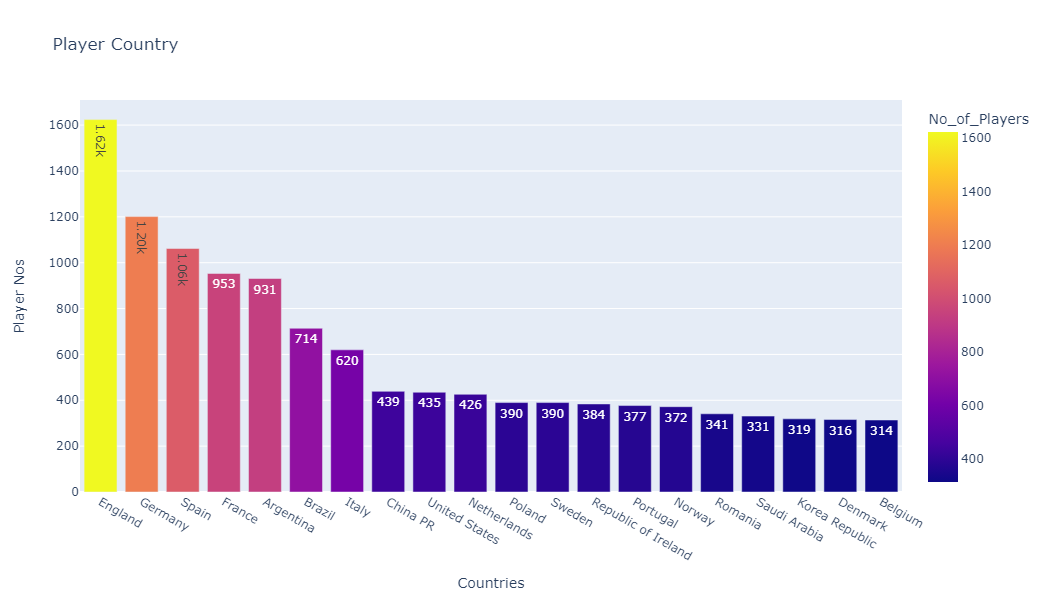

In [14]:
#visualizing most popular characters using plotly graph
fig = px.bar(player_country.head(20), x = 'Country' , y = 'No_of_Players', color = 'No_of_Players', 
             title = 'Player Country',width=800, height=600, text_auto='.3s' )
fig.update_xaxes(title_text = 'Countries')
fig.update_yaxes(title_text = 'Player Nos')
fig.show()

**Comment** : The top 20 countries make up 65% of the total 18,539 players in the FIFA23 dataset with England (1,624) having most players. 

#### 3.2 Skill Level of Best Players by Age

In [15]:
#Top Clubs
#creating a new data frame for top players in top clubs by filtering player_info using df.query() method 
top_players = players_info.query('PlayerCategory in ["World Class", "Top Level"]')

#Number of players in the players in the top_clubs dataframe
print('Number of Top Players :', top_players.shape[0])

Number of Top Players : 505


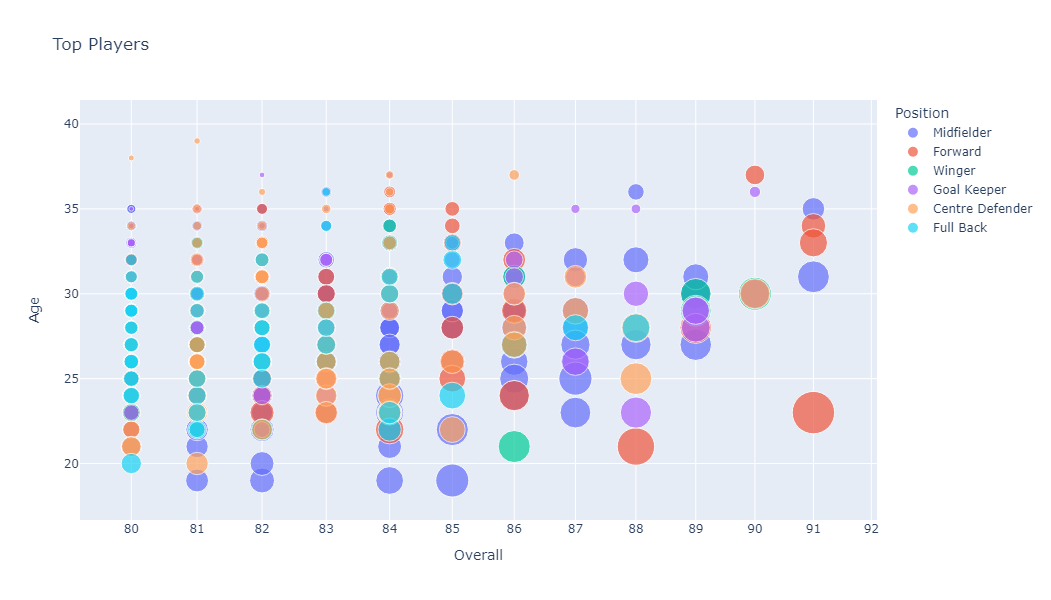

In [16]:
#viewing the distribution of top players skill level
fig = px.scatter(top_players, x="Overall", y="Age",size="Value(inEuro)", color="Position",hover_name="PlayerName", title = 'Top Players',
                 log_x=True, size_max=30, width=800, height=600)
fig.show()

**Comment**: The bubble chart shows most players have the best Overall scores (peak) in their late 20s and early 30s. However, there are few excpetions at each end of the age spectrum. Young Stars like Bellingham, Pedri, Vinicius Jr, Haaland and Mbappe and Older players like Messi, C.Ronaldo, Neur, Modric and Thiago Silva

#### 3.3 Distribution of Player Skill Level

In [17]:
#pie chart of player cateogry distribution
category_count = players_info['PlayerCategory'].value_counts()

#converting series to dataframe
player_category = pd.DataFrame(category_count)

#resetting index and setting column names
player_category = player_category.reset_index()
player_category.columns = ['Category', 'No_of_Players']
player_category

,Category,No_of_Players
0,Mid Level,10048
1,Unrated,6585
2,Good,1282
3,Top Level,414
4,World Class,91


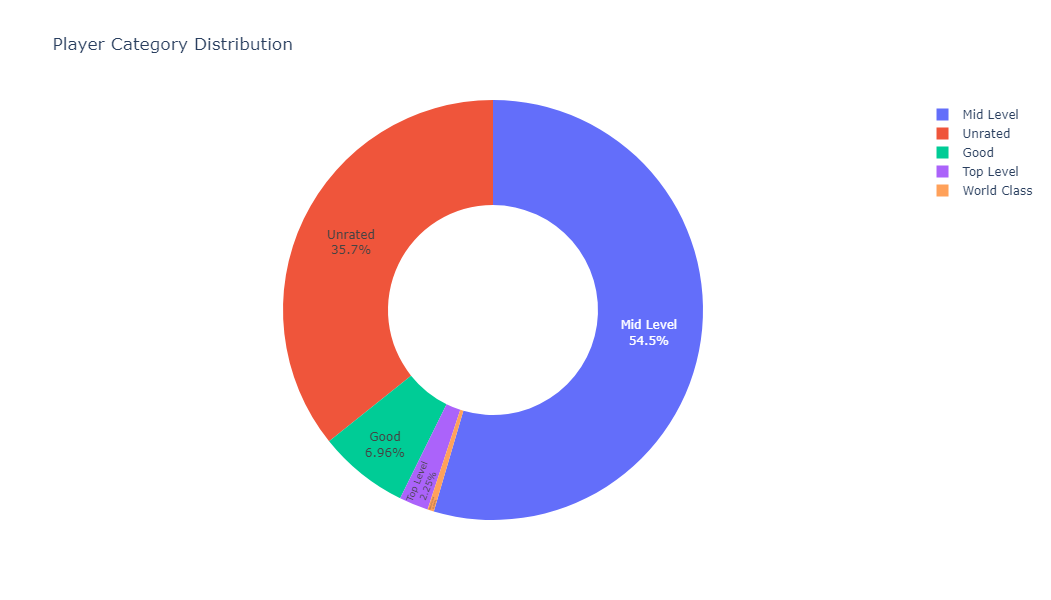

In [18]:
#player categories
fig = px.pie(player_category, values='No_of_Players', names='Category',
             title='Player Category Distribution',
             hover_data=['Category'], width=800, height=600, hole = 0.5)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

**Comment** - Only 505 players (2.72) can be considered elite players i.e. World Class or Top Level. Majority of players (55%) fall in Mid Level category with Overall ranging from 64 to 74. 

#### 3.4 - Distribution of Players Physical Feautres (Height and Weight)

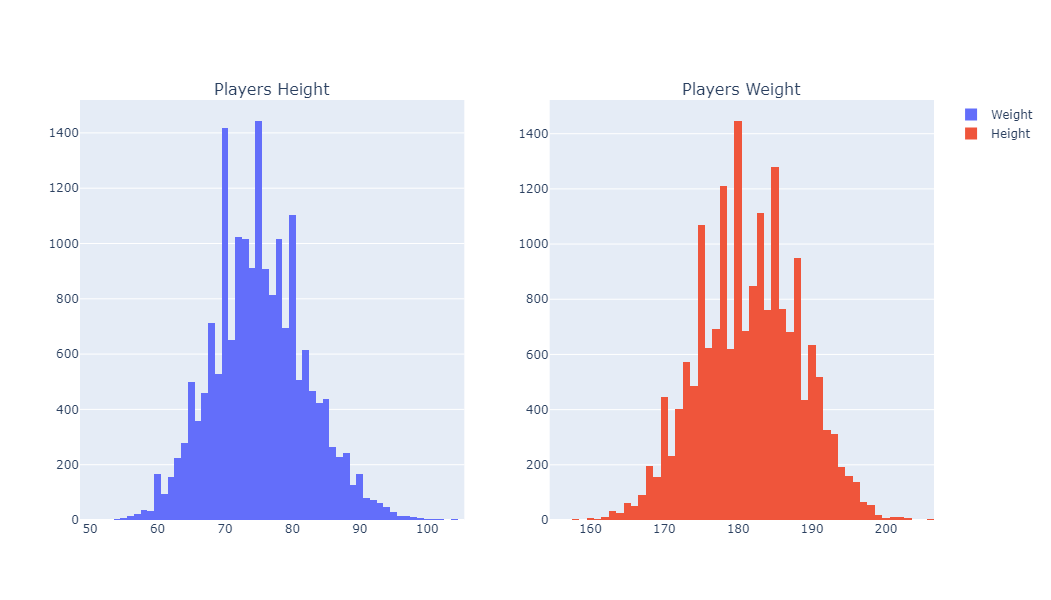

In [19]:
#set subplots layout
fig = make_subplots(rows=1, cols=2,subplot_titles=('Players Height', 'Players Weight'))

#Add plot traces
fig.add_trace(go.Histogram(x=players_info['Weight(inkg)'], name='Weight'),row=1, col=1)

fig.add_trace(go.Histogram(x=players_info['Height(incm)'], name='Height'),row=1, col=2)

fig.update_layout(width = 1000, height=600, showlegend=True)

fig.show()

#### 3.5 Player Cost (Value and Wage) by Age

Using player value and wage to calculate average player cost at each age

In [20]:
players_costs = players_info.groupby(['Age', 'ClubCategory']).mean()[['Value(inEuro)','Wage(inEuro)']].reset_index()
players_costs.head()

,Age,ClubCategory,Value(inEuro),Wage(inEuro)
0,16,Others,3.631667e+05,505.000000
1,16,Top Club,8.250000e+05,1000.000000
2,17,Others,4.725877e+05,587.938596
3,17,Top Club,3.080952e+06,1988.095238
4,18,Others,6.662027e+05,1122.164948


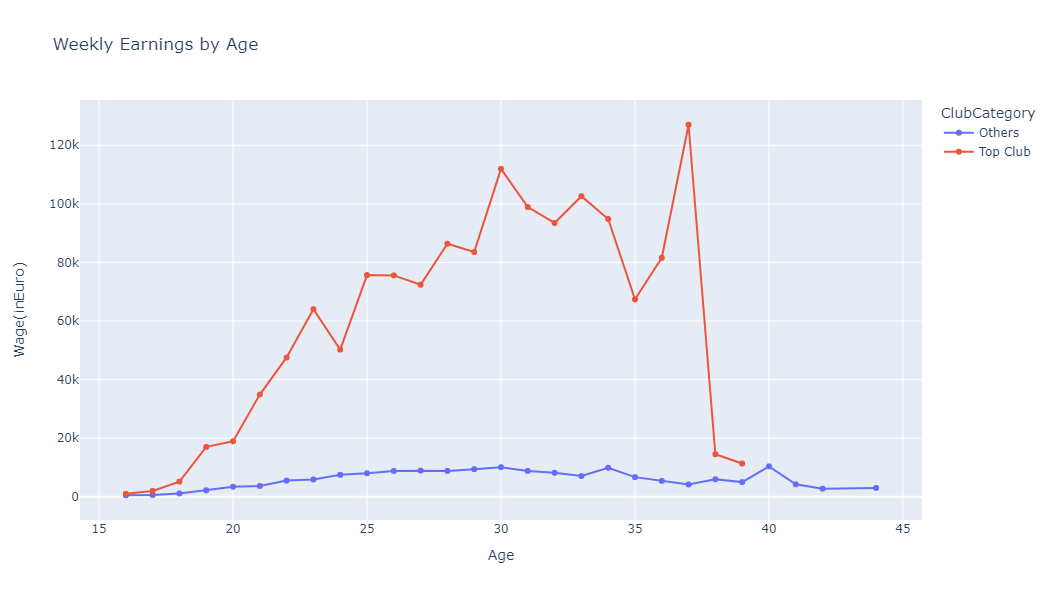

In [21]:
fig = px.line(players_costs, x="Age", y="Wage(inEuro)", title='Weekly Earnings by Age', markers =True, 
              color ='ClubCategory', width=800, height=600, )
fig.show()

**Comment**: For top clubs, weekly wages on the averages rises steadily from age 16 to 24 from 1000 Euros to 64,020 Euros. There is a slight deep at age 25, from where wages continue to go up steadily fomr 50,229Euro to 112,000 Euro at age 30.

Wages start declining from age 30 till players retire at age 40. However, there are exceptions for some old stars like Modric, Messi, Ronaldo et al that increase the average wage of platers in their mid 30s

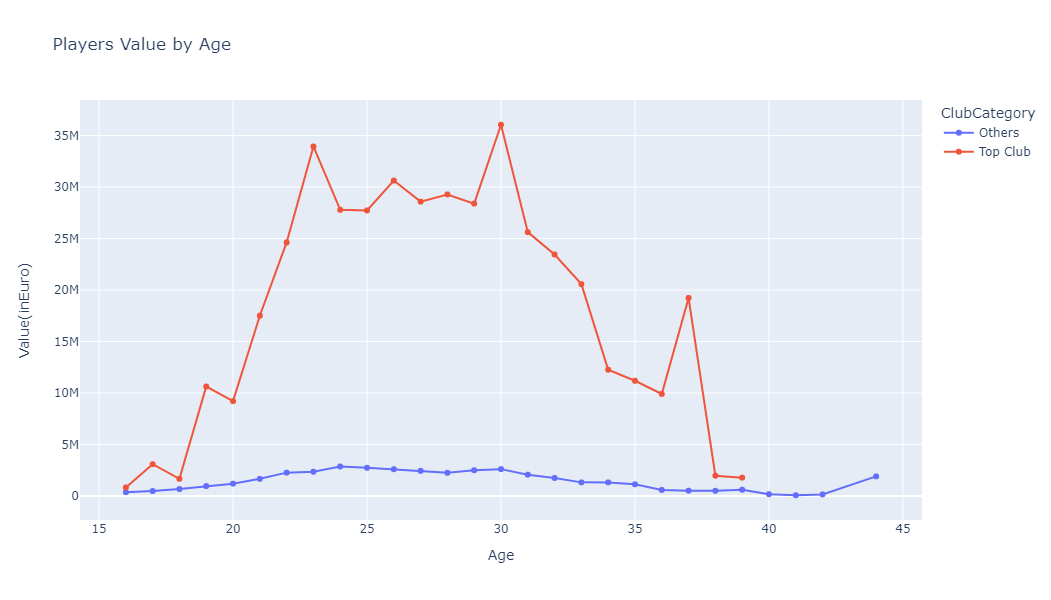

In [22]:
fig = px.line(players_costs, x="Age", y="Value(inEuro)", title='Players Value by Age', markers =True, 
              color ='ClubCategory', width=800, height=600, )
fig.show()

**Comment**: Player transfer value at top clubs is on an upward trajectory from age 16 (825k) to age 23 (33.9m). There is slight tip from age 24 to 29 when player value goes lower tp 28.4m. After the dip, player value peaks at age 30 (36.05m) from where it starts a steady decline till retirement.

#### 3.6 Wage vs Value of Top Players

The players_info dataframe is filtered using the query() method. The wage and value of top players i.e. players in World Class and Top Level category. After filtering, the data is then displayed on a scatter plot

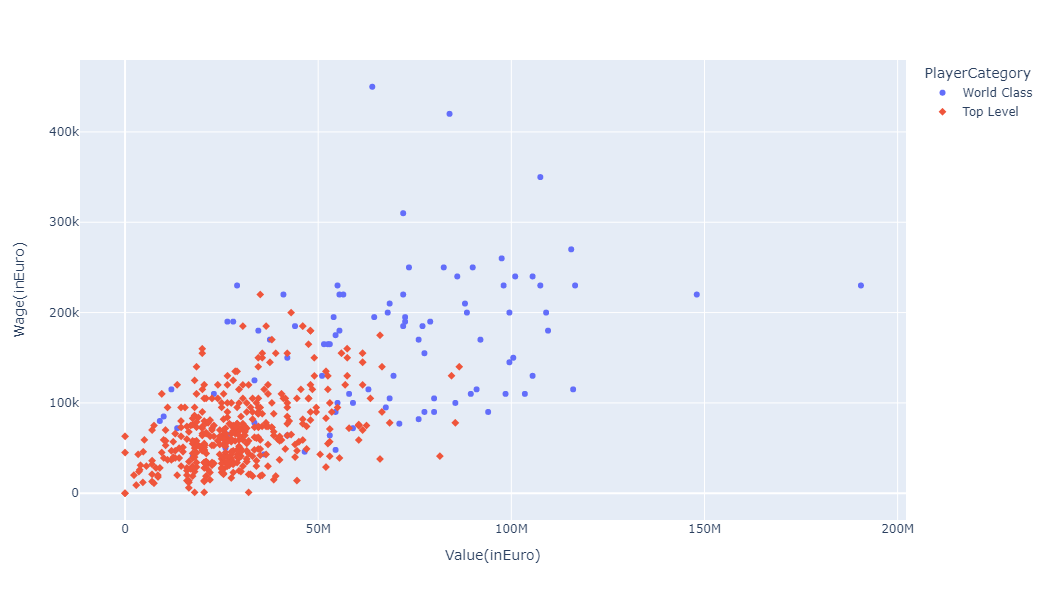

In [23]:
players_info2 = players_info.query('PlayerCategory in ["World Class", "Top Level"]')

fig = px.scatter(players_info2, x="Value(inEuro)", y="Wage(inEuro)", color='PlayerCategory',hover_name="PlayerName",
                 symbol="PlayerCategory", width=800, height=600)
fig.show()

#### 3.7 Club Ranking

In this section, the clubs column created in 2.4 will be used to created a sub-category called top club. Club that fall into this category will then be ranked based on average core skills of their players

In [24]:
#Top Clubs
#creating a new data frame for top players in top clubs by filtering player_info using df.query() method 
top_clubs = players_info.query('ClubCategory == "Top Club"')

#Number of players in the players in the top_clubs dataframe
print('Number of Top Players :', top_clubs.shape[0])

Number of Top Players : 756


In [25]:
#Rating Clubs by core skills
club_rating = top_clubs.groupby('ClubName').mean()[['PaceTotal', 'DribblingTotal','PassingTotal','ShootingTotal','DefendingTotal',
                                                    'GKRating' ]].reset_index()

#Adding new total column
club_rating['SumTotal'] = club_rating.sum(axis=1)
club_rating.head()

,ClubName,PaceTotal,DribblingTotal,PassingTotal,ShootingTotal,DefendingTotal,GKRating,SumTotal
0,Ajax,72.444444,72.666667,68.222222,60.851852,58.666667,23.074074,355.925926
1,Arsenal,72.310345,73.275862,68.551724,59.241379,56.310345,24.793103,354.482759
2,Atlético de Madrid,71.242424,71.636364,68.393939,63.757576,58.575758,26.212121,359.818182
3,Bayer 04 Leverkusen,74.172414,75.241379,68.827586,62.896552,56.689655,26.482759,364.310345
4,Borussia Dortmund,73.878788,73.393939,67.090909,62.787879,55.666667,25.636364,358.454545


In [26]:
#Sorting df by SumTotal
club_rating_sorted = club_rating.sort_values('SumTotal', ascending = True)

#Drop Sumtotal Column
club_rating_sorted2 = club_rating_sorted.drop(columns = 'SumTotal', axis = 1)
club_rating_sorted2.head()

,ClubName,PaceTotal,DribblingTotal,PassingTotal,ShootingTotal,DefendingTotal,GKRating
17,Olympique de Marseille,70.878788,68.606061,63.939394,58.000000,55.606061,24.090909
16,Olympique Lyonnais,71.741935,71.677419,66.032258,60.387097,52.645161,25.483871
8,FC Porto,73.633333,71.400000,64.600000,60.700000,52.700000,26.466667
11,LOSC Lille,72.869565,71.956522,66.391304,61.869565,52.260870,25.608696
24,Sporting CP,75.066667,72.066667,65.466667,61.266667,54.700000,23.800000


In [27]:
#rearranging df to get a horizontal stack barchat of variables
club_rating_sorted3 = club_rating_sorted2.set_index("ClubName").stack().to_frame().reset_index()

#rounding df to 2 decimal places
club_rating_sorted3 = club_rating_sorted3.round(decimals = 2)
club_rating_sorted3.head(6)

,ClubName,level_1,0
0,Olympique de Marseille,PaceTotal,70.88
1,Olympique de Marseille,DribblingTotal,68.61
2,Olympique de Marseille,PassingTotal,63.94
3,Olympique de Marseille,ShootingTotal,58.00
4,Olympique de Marseille,DefendingTotal,55.61
5,Olympique de Marseille,GKRating,24.09


In [28]:
#rename columns
club_rating_sorted3.rename(columns = {'level_1':'SkillType', 0:'SkillScore'}, inplace = True)
club_rating_sorted3.head(6)

,ClubName,SkillType,SkillScore
0,Olympique de Marseille,PaceTotal,70.88
1,Olympique de Marseille,DribblingTotal,68.61
2,Olympique de Marseille,PassingTotal,63.94
3,Olympique de Marseille,ShootingTotal,58.00
4,Olympique de Marseille,DefendingTotal,55.61
5,Olympique de Marseille,GKRating,24.09


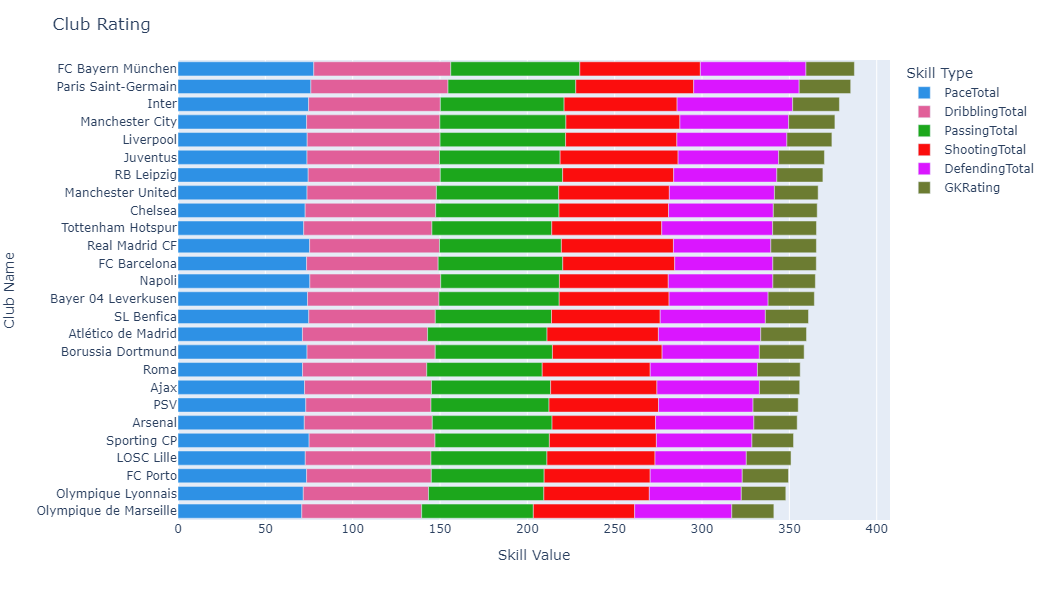

In [29]:
fig = px.bar(club_rating_sorted3,y="ClubName",x="SkillScore", color="SkillType",
    color_discrete_map={
        "PaceTotal": "#2E91E5",
        "DribblingTotal": "#E15F99",
        "PassingTotal": "#1CA71C",
        "ShootingTotal": "#FB0D0D",
        "DefendingTotal": "#DA16FF",
        "GKRating": "#6C7C32",
    },
)

fig.update_layout(
    title="Club Rating",
    xaxis_title="Skill Value",
    yaxis_title="Club Name",
    legend_title="Skill Type",
    width=1000,
    height=600,
)

#### 3.8 Best Young Players - Current vs Potential Level

Young stars are players less than or equal to 23 with a potential rating greater than 84

In [30]:
#new df is created for players aged 23 or under then sorted by potential
young_stars = players_info.query('(Age <= 23) and (Potential > 84)')[['PlayerName','Overall', 'Potential']]

#selecting top 40 young stars based on potential 
top_prospects = young_stars.nlargest(40, 'Potential').sort_values('Overall', ascending = True).reset_index(drop = True)
top_prospects

,PlayerName,Overall,Potential
0,Moleiro,75,90
1,E. Camavinga,79,89
2,R. Gravenberch,79,89
3,Ansu Fati,79,90
4,Vitinha,79,89
5,J. Gvardiol,81,89
6,J. Musiala,81,90
7,N. Zaniolo,81,88
8,C. Pulisic,82,88
9,F. Wirtz,82,91


In [31]:
#rearranging df to get a horizontal stack barchat of variables
top_prospects2 = top_prospects.set_index("PlayerName").stack().to_frame().reset_index()

#rename columns
top_prospects2.rename(columns = {'level_1':'SkillLevel', 0:'Scores'}, inplace = True)
top_prospects2.head()

,PlayerName,SkillLevel,Scores
0,Moleiro,Overall,75
1,Moleiro,Potential,90
2,E. Camavinga,Overall,79
3,E. Camavinga,Potential,89
4,R. Gravenberch,Overall,79


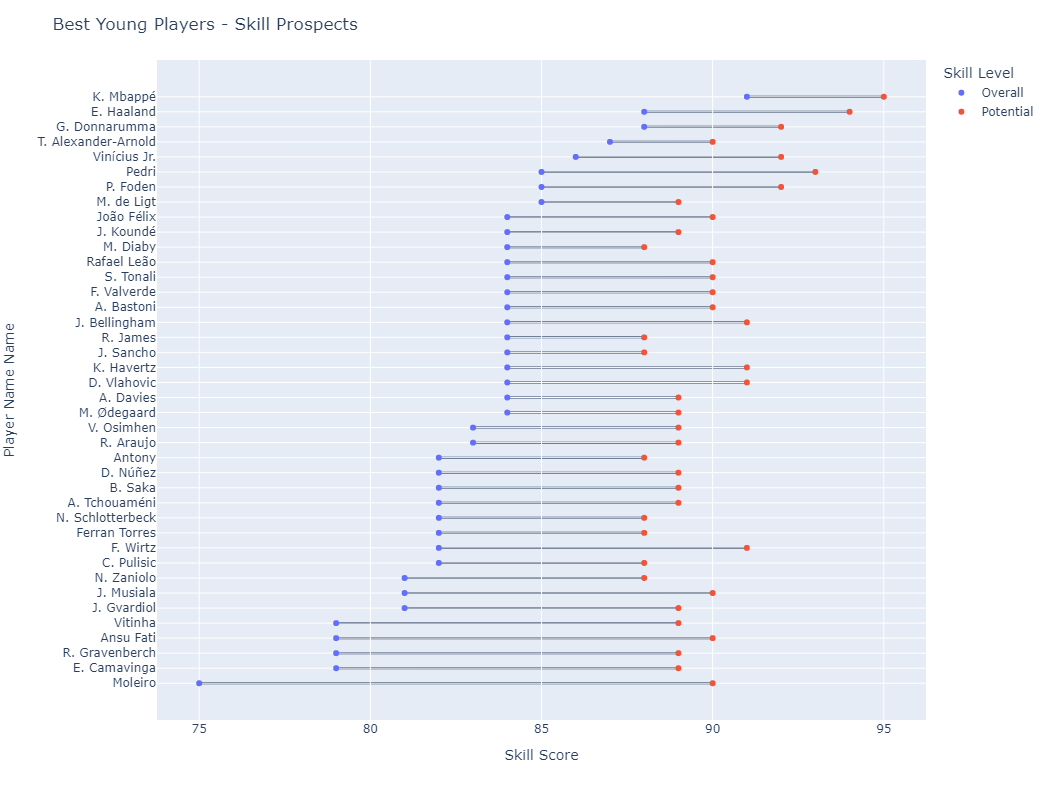

In [32]:
fig = px.scatter(top_prospects2, x="Scores", y="PlayerName", color="SkillLevel", hover_name = "PlayerName")

# iterate on each Player Name
for i in top_prospects2["PlayerName"].unique():
    # filter by region
    df_sub = top_prospects2[top_prospects2["PlayerName"] == i]
    
    fig.add_shape(
        type="line",
        layer="below",
        # connect the two markers
        y0=df_sub.PlayerName.values[0], x0=df_sub.Scores.values[0],
        ## e.g., y1='Marcos', x1=26.60
        y1=df_sub.PlayerName.values[1], x1=df_sub.Scores.values[1], 
    )

fig.update_layout(
title="Best Young Players - Skill Prospects",
xaxis_title="Skill Score",
yaxis_title="Player Name Name",
legend_title="Skill Level",
width=800,
height=800,
)
fig.show()

**Comment** - An important part of the beautiful game is spotting talent before the blossom . This dumbbell graph does this by comparing current and potential performance of young players.

Players like Mbappe, Haaland, Donarumma are close to their peaks at a young age, while players like Gravenberch, Camavinga, and Moliero still have a huge window of improvement before they peak. 

#### 3.9 Key Skills per Position

In [33]:
#Rating Clubs core skills for each position
position_skills = players_info.groupby('Position').mean()[['PaceTotal', 'DribblingTotal','PassingTotal','ShootingTotal','DefendingTotal',
                                                    'HeadingAccuracy', 'Jumping', 'Strength','GKRating' ]].reset_index()
position_skills

,Position,PaceTotal,DribblingTotal,PassingTotal,ShootingTotal,DefendingTotal,HeadingAccuracy,Jumping,Strength,GKRating
0,Centre Defender,59.754338,52.453043,49.709997,37.045167,65.642523,65.081520,72.250620,76.118425,17.980171
1,Forward,69.696831,64.087438,53.561665,65.342115,30.447499,64.321115,69.152348,71.121802,18.059565
2,Full Back,73.528280,62.811466,57.516352,45.282032,61.512890,54.044633,67.057330,63.161601,17.963447
3,Goal Keeper,64.935704,65.924014,61.965416,62.815392,35.983439,13.803702,55.865563,59.507063,65.103751
4,Midfielder,69.581276,66.825603,62.553875,57.720280,50.496646,50.621236,61.283859,60.139004,18.001570
5,Winger,79.542074,71.093933,62.557730,64.594912,36.624266,50.223092,61.215264,57.172211,18.332681


##### Key Defensive Skills

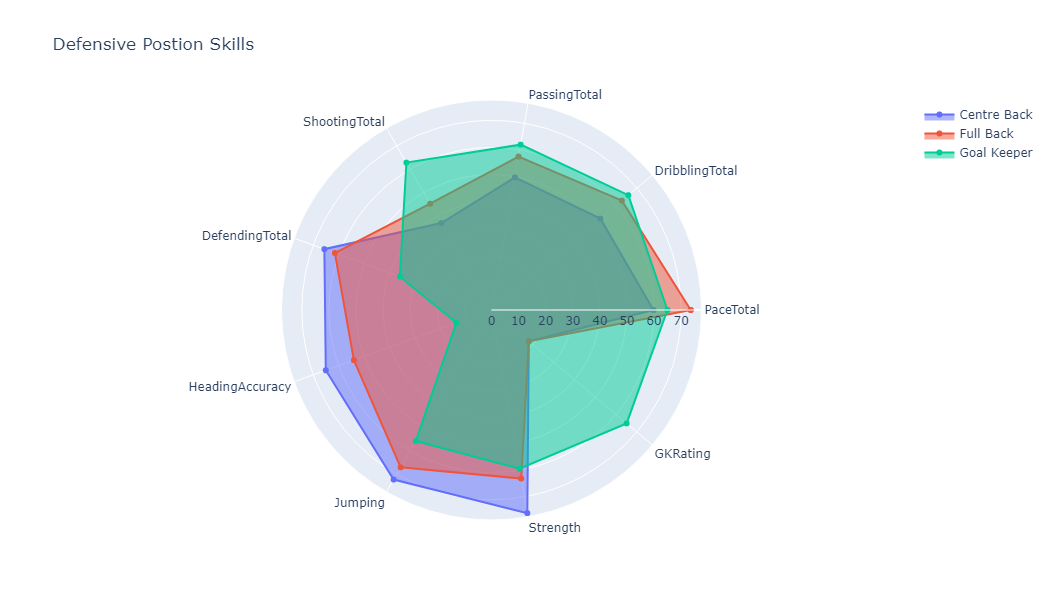

In [34]:
#Spider Chart for Defensive Positions
categories = ['PaceTotal','DribblingTotal', 'PassingTotal','ShootingTotal', 'DefendingTotal','HeadingAccuracy','Jumping', 'Strength','GKRating']
categories = [*categories, categories[0]]

#convert values in each position to list with values for every skill
CentreBack = position_skills.loc[0, ['PaceTotal', 'DribblingTotal', 'PassingTotal','ShootingTotal', 'DefendingTotal', 'HeadingAccuracy', 
                                     'Jumping', 'Strength', 'GKRating']].values.flatten().tolist()

FullBack = position_skills.loc[2, ['PaceTotal', 'DribblingTotal', 'PassingTotal','ShootingTotal', 'DefendingTotal', 'HeadingAccuracy', 
                                  'Jumping', 'Strength', 'GKRating']].values.flatten().tolist()

GoalKeeper = position_skills.loc[3, ['PaceTotal', 'DribblingTotal', 'PassingTotal','ShootingTotal', 'DefendingTotal', 'HeadingAccuracy', 
                                   'Jumping', 'Strength', 'GKRating']].values.flatten().tolist()

CentreBack = [*CentreBack, CentreBack[0]]
FullBack = [*FullBack, FullBack[0]]
GoalKeeper = [*GoalKeeper, GoalKeeper[0]]


fig = go.Figure(
    data=[
        go.Scatterpolar(r=CentreBack, theta=categories, fill='toself', name='Centre Back'),
        go.Scatterpolar(r=FullBack, theta=categories, fill='toself', name='Full Back'),
        go.Scatterpolar(r=GoalKeeper, theta=categories, fill='toself', name='Goal Keeper')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Defensive Postion Skills'),width=800, height=600,
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

fig.show()

**Key Skill for each Defensive Position**

Centre Back - Jumping, Strength, Heading Accuracy, Defending Total

Full Back - Pace, Defending Total

Goal Keeper - Shooting, Passing, GK Rating

##### Key Offensive Skills

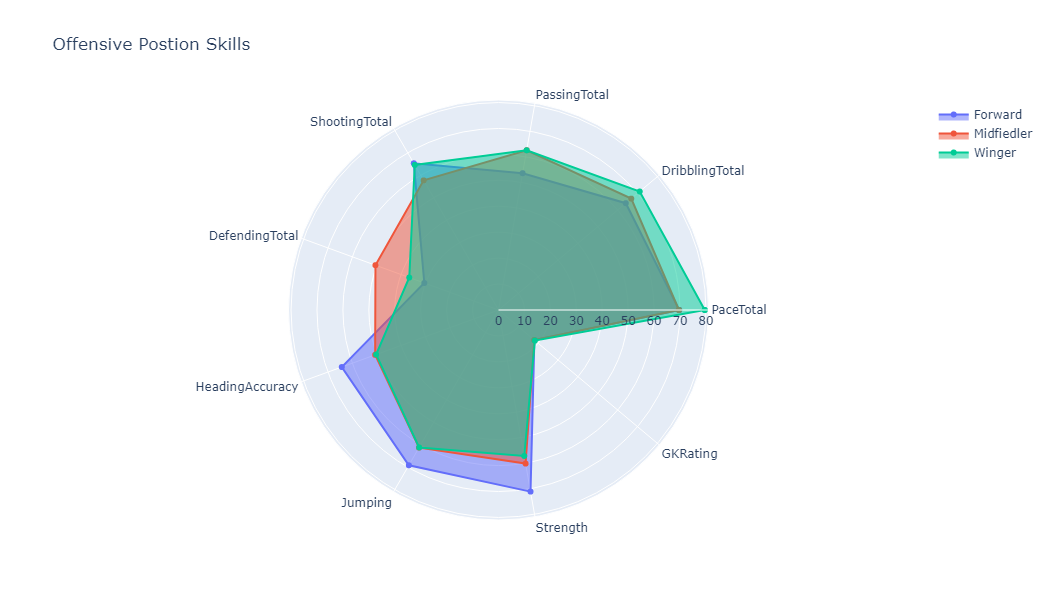

In [35]:
#Spider Chart for Defensive Positions
categories = ['PaceTotal','DribblingTotal', 'PassingTotal','ShootingTotal','DefendingTotal','HeadingAccuracy','Jumping', 'Strength','GKRating']
categories = [*categories, categories[0]]

#convert values in each position to list with values for every skill
Forward = position_skills.loc[1, ['PaceTotal', 'DribblingTotal', 'PassingTotal','ShootingTotal', 'DefendingTotal', 'HeadingAccuracy', 
                                     'Jumping', 'Strength', 'GKRating']].values.flatten().tolist()

Midfielder = position_skills.loc[4, ['PaceTotal', 'DribblingTotal', 'PassingTotal','ShootingTotal', 'DefendingTotal', 'HeadingAccuracy', 
                                  'Jumping', 'Strength', 'GKRating']].values.flatten().tolist()

Winger = position_skills.loc[5, ['PaceTotal', 'DribblingTotal', 'PassingTotal','ShootingTotal', 'DefendingTotal', 'HeadingAccuracy', 
                                   'Jumping', 'Strength', 'GKRating']].values.flatten().tolist()

Forward = [*Forward, Forward[0]]
Midfielder = [*Midfielder, Midfielder[0]]
Winger = [*Winger, Winger[0]]


fig = go.Figure(
    data=[
        go.Scatterpolar(r=Forward, theta=categories, fill='toself', name='Forward'),
        go.Scatterpolar(r=Midfielder, theta=categories, fill='toself', name='Midfiedler'),
        go.Scatterpolar(r=Winger, theta=categories, fill='toself', name='Winger')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Offensive Postion Skills'),width=800, height=600,
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

fig.show()

**Key Skill for each Offensive Position**

Forward - Jumping, Strength, Heading Accuracy, Shooting

Midfielder - Passing, Defending Total, Strength

Winger - Dribbling, Pace, Passing, Shooting

#### 3.10 Winning Team

The best player in each position is extracted using the lambda function. Then the list of players is displayed in a plotly table

In [36]:
#getting specific columns from the players_info data frame
players_details = players_info[['PlayerName','ClubName','Age','BestPosition','Overall']]

#getting players with maximum overall points for each positon
best_players =players_details.groupby('BestPosition').apply(lambda x:np.max(x['Overall'])).reset_index(name='Overall')
best_players_pos =pd.merge(players_details,best_players,how='inner',left_on=['BestPosition','Overall'],right_on=['BestPosition','Overall'])

#getting unique player per postion by dropping duplicate overall scores
winning_team = best_players_pos.drop_duplicates(subset = ['BestPosition', 'Overall'], keep = 'last').reset_index(drop = True)
winning_team

,PlayerName,ClubName,Age,BestPosition,Overall
0,L. Messi,Paris Saint-Germain,35,CAM,91
1,K. Benzema,Real Madrid CF,34,CF,91
2,K. Mbappé,Paris Saint-Germain,23,ST,91
3,K. De Bruyne,Manchester City,31,CM,91
4,M. Salah,Liverpool,30,RW,90
5,M. Neuer,FC Bayern München,36,GK,90
6,V. van Dijk,Liverpool,30,CB,90
7,H. Son,Tottenham Hotspur,29,LW,89
8,N. Kanté,Chelsea,31,CDM,89
9,S. Mané,FC Bayern München,30,LM,89


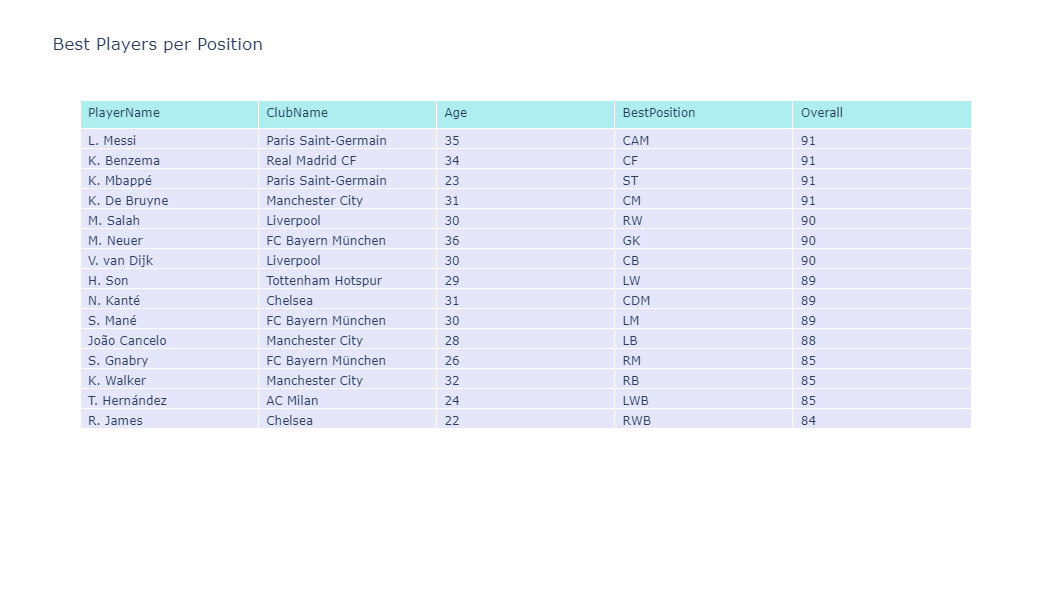

In [37]:
#display dataframe in a plotly table
fig = go.Figure(data=[go.Table(header=dict(values=list(winning_team.columns),fill_color='paleturquoise',align='left'),
                               cells=dict(values=[winning_team.PlayerName, winning_team.ClubName, winning_team.Age
                                                  ,winning_team.BestPosition, winning_team.Overall],fill_color='lavender', align='left'))],
                      layout=go.Layout(title=go.layout.Title(text='Best Players per Position'),width=1000, height=600, showlegend=True))

fig.show()

**Comment** - Average age of the winning team is 29.4 years while average Overall skill score is 88.53.  FC Bayern Munchen (3), Manchester City (3), Paris Saint Gemrain (2), Chelsea (2)and Liverpool (2) have multiple players on the list

#### 3.11 - Overall Stats by Confedration & Country

The total stats for each player is aggregated on a country and confedration level to view countries with the best players. Results are then displayed in a Treemap

In [38]:
# extracting details for only top 40 countries based on conditional column in section 2.4
top_countries = players_info.query('Confederation in ["CONMEBOL", "CONCACAF", "CAF", "AFC", "UEFA"]')

top_countries_stats = top_countries[['PlayerName', 'Overall', 'TotalStats', 'Nationality', 'Confederation']]
top_countries_stats.head(10)

,PlayerName,Overall,TotalStats,Nationality,Confederation
0,L. Messi,91,2190,Argentina,CONMEBOL
1,K. Benzema,91,2147,France,UEFA
2,R. Lewandowski,91,2205,Poland,UEFA
3,K. De Bruyne,91,2303,Belgium,UEFA
4,K. Mbappé,91,2177,France,UEFA
5,M. Salah,90,2226,Egypt,CAF
6,T. Courtois,90,1334,Belgium,UEFA
7,M. Neuer,90,1535,Germany,UEFA
8,Cristiano Ronaldo,90,2159,Portugal,UEFA
9,V. van Dijk,90,2117,Netherlands,UEFA


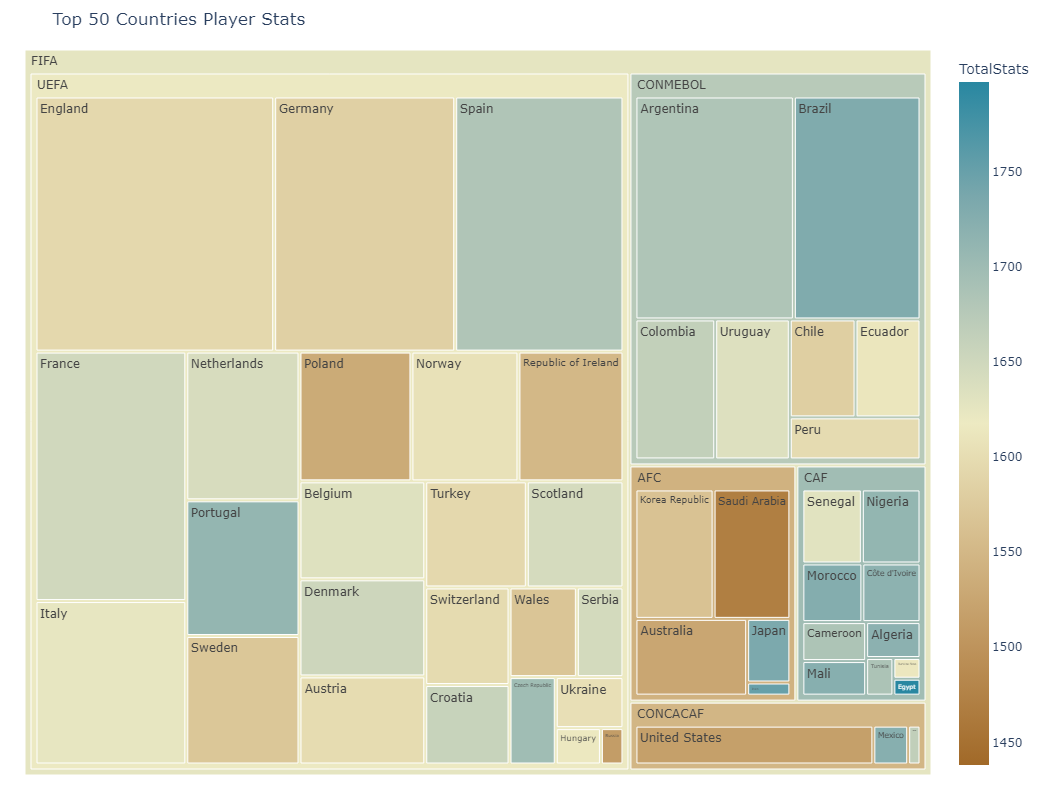

In [39]:
fig = px.treemap(top_countries_stats, path=[px.Constant("FIFA"), 'Confederation', 'Nationality'], values='Overall',
                  color='TotalStats',color_continuous_scale= 'earth',
                  color_continuous_midpoint=np.average(players_info['TotalStats'], weights=players_info['Overall']))

fig.update_layout(title="Top 50 Countries Player Stats", margin = dict(t=50, l=25, r=25, b=25),width=800, height=800)
fig.show()

### Conclusion

This project makes use of the plotly vizualation  package to analyze player details from the FIFA 23 dataset from Kaggle.com. After loading the dataset in section 1, feature engineering was carried out in section 2 by creating new conditional columns. These new columns were then applied while creating vizualisation in section 3.

The vizualisation section has 11 sub sections with different plots telling stories hightlighting trends that gives a better understanding of the dataset.
